In [1]:
# Player Churn Prediction
# This notebook predicts player churn using multiple ML algorithms

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle

In [2]:
# Load data
df = pd.read_csv('../player_game_statistics.csv')
df.head()

,player_name,game_name,total_games_played,total_wins,total_losses,total_moves,total_time_played_minutes,win_ratio,age,gender,country,is_churned,player_level,engagement_level,win_probability
0,David Ali,battleship,37,21,16,1766,919,56.76,64,Male,South Korea,0,intermediate,73.18,0.5676
1,Mohammed Ali,battleship,88,44,44,4267,2416,50.00,51,Male,Japan,0,intermediate,100.00,0.5000
2,Amir Nguyen,battleship,136,42,94,6592,3597,30.88,18,Male,USA,0,intermediate,100.00,0.3088
3,Sophia Brown,battleship,120,86,34,6016,3259,71.67,43,Male,Brazil,0,expert,100.00,0.7167
4,Elena Garcia,reversi,19,3,16,249,244,15.79,64,Male,Japan,0,intermediate,52.48,0.1579


In [3]:
# Examine the data
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData info:")
print(df.info())

Dataset shape: (1000, 15)

First few rows:
    player_name   game_name  total_games_played  total_wins  total_losses  \
0     David Ali  battleship                  37          21            16   
1  Mohammed Ali  battleship                  88          44            44   
2   Amir Nguyen  battleship                 136          42            94   
3  Sophia Brown  battleship                 120          86            34   
4  Elena Garcia     reversi                  19           3            16   

   total_moves  total_time_played_minutes  win_ratio  age gender      country  \
0         1766                        919      56.76   64   Male  South Korea   
1         4267                       2416      50.00   51   Male        Japan   
2         6592                       3597      30.88   18   Male          USA   
3         6016                       3259      71.67   43   Male       Brazil   
4          249                        244      15.79   64   Male        Japan   

   is_c

In [4]:
df.columns

Index(['player_name', 'game_name', 'total_games_played', 'total_wins',
       'total_losses', 'total_moves', 'total_time_played_minutes', 'win_ratio',
       'age', 'gender', 'country', 'is_churned', 'player_level',
       'engagement_level', 'win_probability'],
      dtype='object')

In [5]:
# Check class distribution
print("\nChurn distribution:")
print(df['is_churned'].value_counts())
print("\nChurn distribution (percentage):")
print(df['is_churned'].value_counts(normalize=True) * 100)


Churn distribution:
is_churned
0    941
1     59
Name: count, dtype: int64

Churn distribution (percentage):
is_churned
0    94.1
1     5.9
Name: proportion, dtype: float64


In [6]:
# Data Preprocessing for Churn Prediction
# Convert categorical variables - use separate encoders
gender_encoder = LabelEncoder()
country_encoder = LabelEncoder()

df['gender_encoded'] = gender_encoder.fit_transform(df['gender'])
df['country_encoded'] = country_encoder.fit_transform(df['country'])

# Select features for churn prediction
features = ['total_games_played', 'win_ratio', 'total_time_played_minutes', 
            'gender_encoded', 'country_encoded', 'age']

X = df[features]
y = df['is_churned']

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}



Random Forest Results:
Cross-validation scores: 0.9724999999999999

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       181
           1       1.00      0.68      0.81        19

    accuracy                           0.97       200
   macro avg       0.98      0.84      0.90       200
weighted avg       0.97      0.97      0.97       200



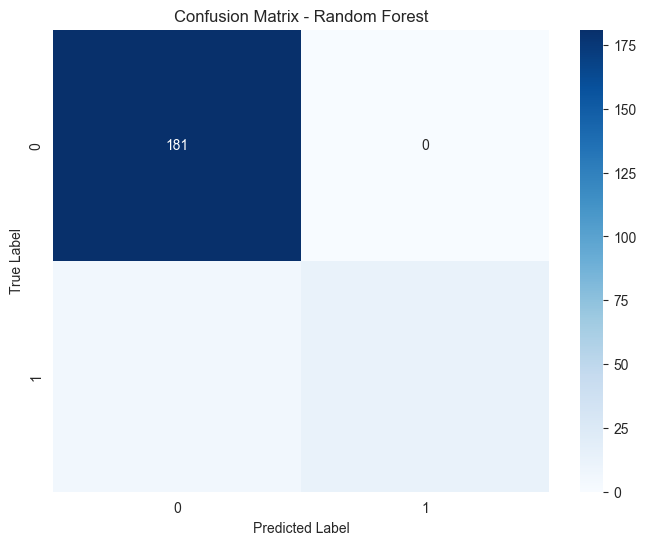


Gradient Boosting Results:
Cross-validation scores: 0.9700000000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       181
           1       0.78      0.74      0.76        19

    accuracy                           0.95       200
   macro avg       0.88      0.86      0.87       200
weighted avg       0.95      0.95      0.95       200



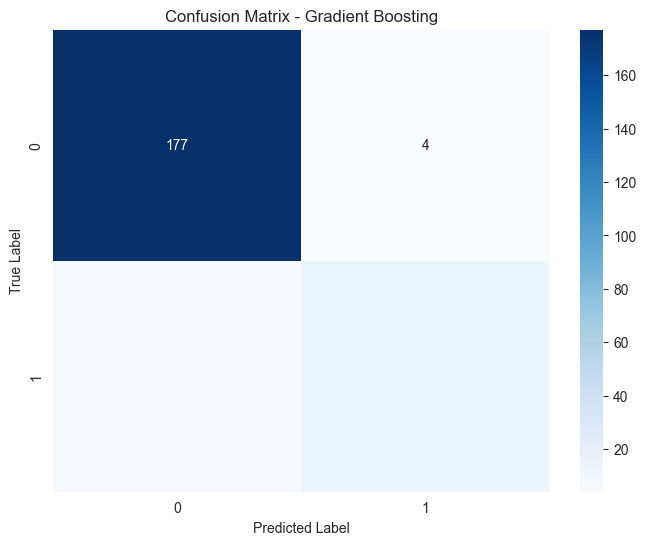


Logistic Regression Results:
Cross-validation scores: 0.9525

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       181
           1       1.00      0.16      0.27        19

    accuracy                           0.92       200
   macro avg       0.96      0.58      0.62       200
weighted avg       0.93      0.92      0.89       200



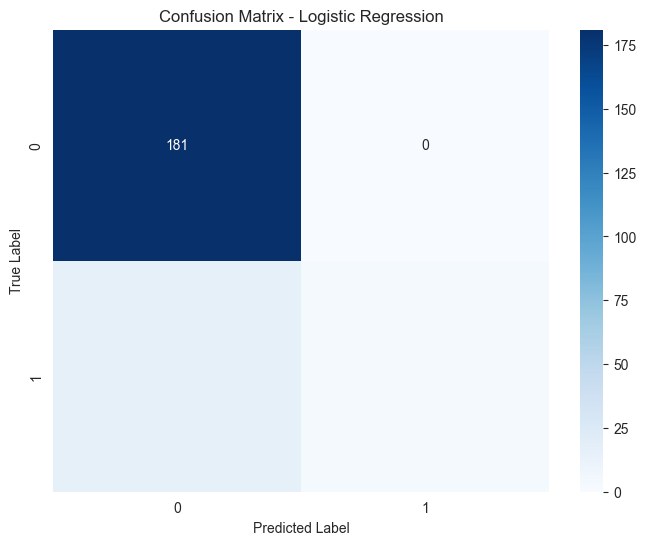


SVM Results:
Cross-validation scores: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200



C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\opeye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

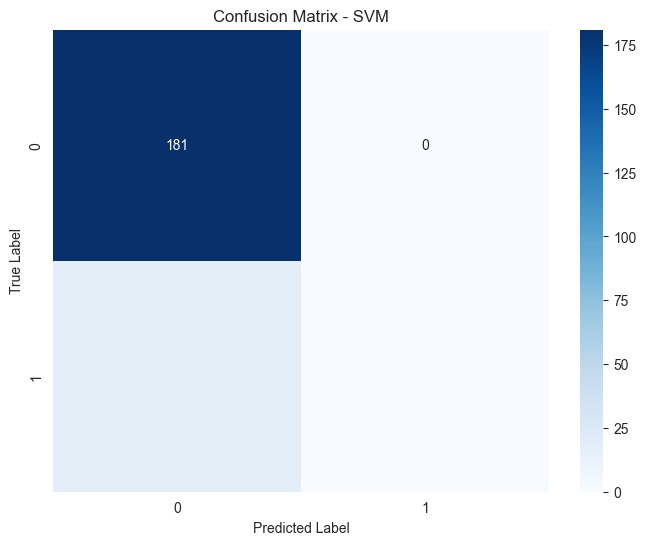

In [10]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Store results
    results[name] = {
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[name]['CV Scores'] = cv_scores
    print(f"\n{name} Results:")
    print("Cross-validation scores:", cv_scores.mean())
    print("\nClassification Report:")
    print(results[name]['Classification Report'])
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

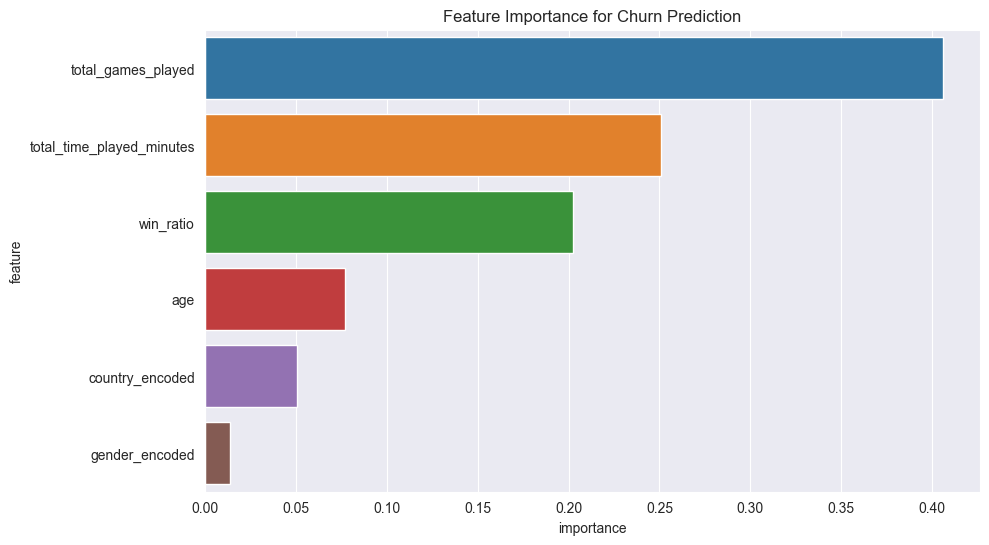

In [11]:
# Feature Importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Churn Prediction')
plt.show()

In [12]:
# Select the best model based on cross-validation scores
best_model_name = max(results, key=lambda x: np.mean(results[x]['CV Scores']))
best_model = models[best_model_name]
best_cv_score = np.mean(results[best_model_name]['CV Scores'])

print(f"\nBest Model: {best_model_name}")
print(f"Best Cross-validation Score: {best_cv_score:.4f}")


Best Model: Random Forest
Best Cross-validation Score: 0.9725


In [13]:
# Save the best model
with open('best_churn_model.pkl','wb') as f:
    pickle.dump(best_model, f)

# Save the scaler
with open('churn_scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

# Save the label encoders
encoder_dict = {
    'gender_encoder': gender_encoder,
    'country_encoder': country_encoder
}

with open('encoders.pkl','wb') as f:  # Changed filename to be more general
    pickle.dump(encoder_dict, f)

In [14]:
def load_churn_model():
    """Load the saved churn prediction model and preprocessing objects"""
    with open('best_churn_model.pkl', 'rb') as f:
        model = pickle.load(f)
    
    with open('churn_scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    with open('encoders.pkl', 'rb') as f:
        encoders = pickle.load(f)
    
    return model, scaler, encoders

def predict_churn(data, model, scaler, encoders):
    """
    Make churn predictions on new data
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the required features
    model: Loaded model
    scaler: Loaded scaler
    encoders: Dictionary of loaded label encoders
    
    Returns:
    np.array: Predicted churn probabilities
    """
    # Preprocess the data
    data_processed = data.copy()
    
    # Encode categorical variables - fixed encoder reference
    data_processed['gender_encoded'] = encoders['gender_encoder'].transform(data_processed['gender'])
    data_processed['country_encoded'] = encoders['country_encoder'].transform(data_processed['country'])  # Fixed this line
    
    # Select and scale features
    features = ['total_games_played', 'win_ratio', 'total_time_played_minutes', 
                'gender_encoded', 'country_encoded', 'age']  # Define features here
    X = data_processed[features]
    X_scaled = scaler.transform(X)
    
    # Make predictions
    return model.predict(X_scaled)

# Example usage
import pandas as pd

# Load the saved model and components
model, scaler, encoders = load_churn_model()

# Create a sample input
sample_input = pd.DataFrame({
    'total_games_played': [100],
    'win_ratio': [0.6],
    'total_time_played_minutes': [5000],
    'gender': ['Male'],  
    'country': ['USA'], 
    'age': [27]
})

# Make prediction
prediction = predict_churn(sample_input, model, scaler, encoders)
print(f"Churn Prediction for sample input: {'Yes' if prediction[0] else 'No'}")

Churn Prediction for sample input: Yes


In [15]:
test_data = pd.DataFrame({
    'total_games_played': [10, 850, 25, 300, 5, 1200],
    'win_ratio': [0.2, 0.65, 0.15, 0.55, 0.1, 0.58],
    'total_time_played_minutes': [200, 12000, 300, 8000, 100, 15000],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'country': ['USA', 'UK', 'South Korea', 'USA', 'UK', 'Japan'],
    'age': [25, 31, 19, 28, 22, 35]
})

# Load model and make predictions
model, scaler, encoders = load_churn_model()
predictions = predict_churn(test_data, model, scaler, encoders)

# Print results
for i, pred in enumerate(predictions):
    print(f"\nPlayer {i+1}:")
    print(f"Games Played: {test_data['total_games_played'][i]}")
    print(f"Win Ratio: {test_data['win_ratio'][i]:.2f}")
    print(f"Time Played: {test_data['total_time_played_minutes'][i]} minutes")
    print(f"Predicted to Churn: {'Yes' if pred else 'No'}")
    print("-" * 30)


Player 1:
Games Played: 10
Win Ratio: 0.20
Time Played: 200 minutes
Predicted to Churn: Yes
------------------------------

Player 2:
Games Played: 850
Win Ratio: 0.65
Time Played: 12000 minutes
Predicted to Churn: Yes
------------------------------

Player 3:
Games Played: 25
Win Ratio: 0.15
Time Played: 300 minutes
Predicted to Churn: Yes
------------------------------

Player 4:
Games Played: 300
Win Ratio: 0.55
Time Played: 8000 minutes
Predicted to Churn: Yes
------------------------------

Player 5:
Games Played: 5
Win Ratio: 0.10
Time Played: 100 minutes
Predicted to Churn: Yes
------------------------------

Player 6:
Games Played: 1200
Win Ratio: 0.58
Time Played: 15000 minutes
Predicted to Churn: Yes
------------------------------


In [16]:
# Test data with extreme cases to see both churn and non-churn predictions
test_data = pd.DataFrame({
    'total_games_played': [5, 1500, 3, 800, 10, 2000],       # Very low vs very high
    'win_ratio': [0.1, 0.85, 0.05, 0.75, 0.15, 0.90],       # Very poor vs excellent
    'total_time_played_minutes': [50, 20000, 30, 15000, 100, 25000],  # Minimal vs heavy engagement
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'country': ['USA', 'UK', 'South Korea', 'USA', 'UK', 'Japan'],
    'age': [25, 31, 19, 28, 22, 35]
})

# Load model and make predictions
model, scaler, encoders = load_churn_model()
predictions = predict_churn(test_data, model, scaler, encoders)

# Print results
for i, pred in enumerate(predictions):
    print(f"\nPlayer {i+1}:")
    print(f"Games Played: {test_data['total_games_played'][i]}")
    print(f"Win Ratio: {test_data['win_ratio'][i]:.2f}")
    print(f"Time Played: {test_data['total_time_played_minutes'][i]} minutes")
    print(f"Gender: {test_data['gender'][i]}")
    print(f"Country: {test_data['country'][i]}")
    print(f"Age: {test_data['age'][i]}")
    print(f"Predicted to Churn: {'Yes' if pred else 'No'}")
    print("-" * 30)


Player 1:
Games Played: 5
Win Ratio: 0.10
Time Played: 50 minutes
Gender: Male
Country: USA
Age: 25
Predicted to Churn: Yes
------------------------------

Player 2:
Games Played: 1500
Win Ratio: 0.85
Time Played: 20000 minutes
Gender: Female
Country: UK
Age: 31
Predicted to Churn: Yes
------------------------------

Player 3:
Games Played: 3
Win Ratio: 0.05
Time Played: 30 minutes
Gender: Male
Country: South Korea
Age: 19
Predicted to Churn: Yes
------------------------------

Player 4:
Games Played: 800
Win Ratio: 0.75
Time Played: 15000 minutes
Gender: Female
Country: USA
Age: 28
Predicted to Churn: Yes
------------------------------

Player 5:
Games Played: 10
Win Ratio: 0.15
Time Played: 100 minutes
Gender: Male
Country: UK
Age: 22
Predicted to Churn: Yes
------------------------------

Player 6:
Games Played: 2000
Win Ratio: 0.90
Time Played: 25000 minutes
Gender: Female
Country: Japan
Age: 35
Predicted to Churn: Yes
------------------------------
